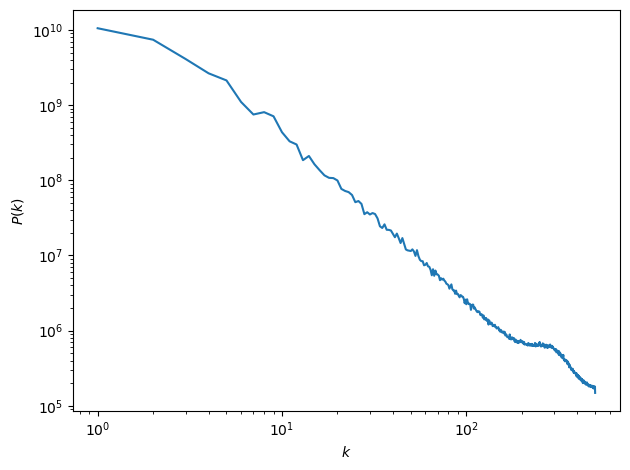

In [1]:
import matplotlib.image as mpimg
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as pl

image = mpimg.imread("clouds.png")

npix = image.shape[0]

fourier_image = np.fft.fftn(image)
fourier_amplitudes = np.abs(fourier_image)**2

kfreq = np.fft.fftfreq(npix) * npix
kfreq2D = np.meshgrid(kfreq, kfreq)
knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

knrm = knrm.flatten()
fourier_amplitudes = fourier_amplitudes.flatten()

kbins = np.arange(0.5, npix//2+1, 1.)
kvals = 0.5 * (kbins[1:] + kbins[:-1])
Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                     statistic = "mean",
                                     bins = kbins)
Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

pl.loglog(kvals, Abins)
pl.xlabel("$k$")
pl.ylabel("$P(k)$")
pl.tight_layout()
pl.savefig("cloud_power_spectrum.png", dpi = 300, bbox_inches = "tight")
# pl.show()

In [4]:
knrm

array([0.        , 1.        , 2.        , ..., 3.16227766, 2.23606798,
       1.41421356])

In [6]:
kfreq

array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
         18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
         27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
         36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
         45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,
         54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,
         63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,
         72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
         81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
         99.,  100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,
        108.,  109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,
        117.,  118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,
        126.,  127.,

In [2]:
kfreq2D[0]

array([[ 0.,  1.,  2., ..., -3., -2., -1.],
       [ 0.,  1.,  2., ..., -3., -2., -1.],
       [ 0.,  1.,  2., ..., -3., -2., -1.],
       ...,
       [ 0.,  1.,  2., ..., -3., -2., -1.],
       [ 0.,  1.,  2., ..., -3., -2., -1.],
       [ 0.,  1.,  2., ..., -3., -2., -1.]])

In [3]:
kfreq2D[1]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 2.,  2.,  2., ...,  2.,  2.,  2.],
       ...,
       [-3., -3., -3., ..., -3., -3., -3.],
       [-2., -2., -2., ..., -2., -2., -2.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [21]:
fourier_amplitudes.max()

556194994247.5422

In [55]:
arr = [20, 3, 2, 50, 7, 1, 34]
print("\narr : \n", arr)  
  
  
# median   
Ab, edges,_ = stats.binned_statistic(arr, [1,1,1,1,1,1,1], statistic ='count', bins = 6)
print("edges", edges)
print("\nbinned_statistic for count : \n", Ab)  
Ab, edges,_ = stats.binned_statistic(arr, [4,1,1,1,1,0,1], statistic ='sum', bins = 6)
print("\nbinned_statistic for sum with [4,1,1,1,1,0,1] : \n", Ab)  

Ab, edges,_ = stats.binned_statistic(arr, [4,1,1,1,1,0,1], statistic ='mean', bins = 6)
print("\nbinned_statistic for mean with [4,1,1,1,1,0,1] : \n", Ab)  
# print(edges)

# pl.loglog(arr, Ab)
# pl.scatter(arr, Ab)
# pl.xlabel("$k$")
# pl.ylabel("$P(k)$")
# pl.tight_layout()
# pl.show()
# pl.savefig("cloud_power_spectrum.png", dpi = 300, bbox_inches = "tight")


arr : 
 [20, 3, 2, 50, 7, 1, 34]
edges [ 1.          9.16666667 17.33333333 25.5        33.66666667 41.83333333
 50.        ]

binned_statistic for count : 
 [4. 0. 1. 0. 1. 1.]

binned_statistic for sum with [4,1,1,1,1,0,1] : 
 [3. 0. 4. 0. 1. 1.]

binned_statistic for mean with [4,1,1,1,1,0,1] : 
 [0.75  nan 4.    nan 1.   1.  ]


In [48]:
2/3

0.6666666666666666


arr : 
 [20, 2, 7, 1, 34]

binned_statistic for count : 
 [1. 1. 1. 1. 1.]
[0.  0.8 1.6 2.4 3.2 4. ]


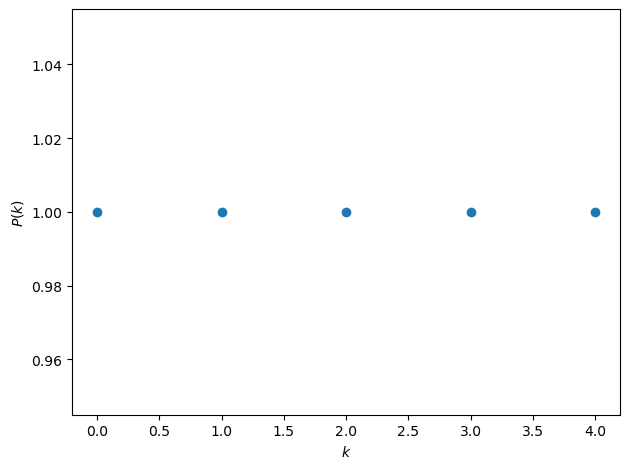

In [12]:
arr = [20, 2, 7, 1, 34]
print("\narr : \n", arr)  
  
  
# median   
Ab, edges,_ = stats.binned_statistic(np.arange(5), arr, statistic ='count', bins = 5)
print("\nbinned_statistic for count : \n", Ab)  
print(edges)

# pl.loglog(arr, Ab)
pl.scatter(np.arange(5), Ab)
pl.xlabel("$k$")
pl.ylabel("$P(k)$")
pl.tight_layout()
pl.show()
# pl.savefig("cloud_power_spectrum.png", dpi = 300, bbox_inches = "tight")

In [31]:
np.arange(5)

array([0, 1, 2, 3, 4])

Mean values per bin: [1. 1. 1. 0. 2. 1. 4. 0. 2. 1. 2. 1. 0. 1. 1. 2. 1. 1. 0. 0. 1. 1. 1. 0.
 2. 2. 4. 0. 0. 1. 2. 2. 1. 1. 1. 0. 0. 0. 0. 1. 2. 0. 0. 1. 2. 1. 2. 1.
 1. 1. 1. 0. 1. 3. 1. 3. 0. 0. 0. 0. 0. 3. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 1. 2. 1. 3. 2. 1. 0. 1. 0. 0. 1. 0. 1. 2. 3. 1. 1. 4.
 2. 1. 1. 2.]
Bin edges: [0.0137819  0.02353413 0.03328635 0.04303857 0.0527908  0.06254302
 0.07229525 0.08204747 0.09179969 0.10155192 0.11130414 0.12105637
 0.13080859 0.14056081 0.15031304 0.16006526 0.16981748 0.17956971
 0.18932193 0.19907416 0.20882638 0.2185786  0.22833083 0.23808305
 0.24783528 0.2575875  0.26733972 0.27709195 0.28684417 0.29659639
 0.30634862 0.31610084 0.32585307 0.33560529 0.34535751 0.35510974
 0.36486196 0.37461419 0.38436641 0.39411863 0.40387086 0.41362308
 0.4233753  0.43312753 0.44287975 0.45263198 0.4623842  0.47213642
 0.48188865 0.49164087 0.5013931  0.51114532 0.52089754 0.53064977
 0.54040199 0.55015421 0.55990644 0.56965866 0.57941089 0.5

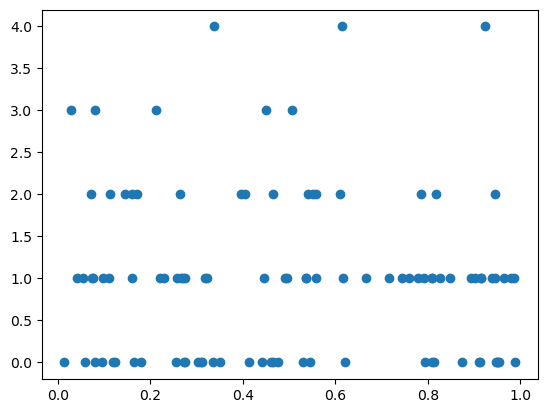

In [8]:
import numpy as np
from scipy.stats import binned_statistic

# Data
x = np.random.rand(100)  # 100 random numbers between 0 and 1
values = np.sin(2 * np.pi * x)  # sine of 2*pi*x

# Compute the mean statistic for each bin
statistic, bin_edges, binnumber = binned_statistic(x, values, statistic='count', bins=100)

print("Mean values per bin:", statistic)
print("Bin edges:", bin_edges)
print("Bin numbers for each element in x:", binnumber)
pl.scatter(x, statistic)


In [8]:
import numpy as np
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)

In [9]:
xv

array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ]])

In [10]:
yv

array([[0., 0., 0.],
       [1., 1., 1.]])